### Lista II - Python: Storytelling

Guilherme Cadori

Dia 06/05/2023

In [1]:
# Importando biblioteca de trabalho
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lendo os dados e criando dataframe de trabalho
df = pd.read_csv('https://raw.githubusercontent.com/EduPekUfpr/PPGOLD7037/main/Data/doencasMentais.csv')

# Conferindo os dados importados
df.head()


,Sexo,Doenca,Idade
0,M,equisofrenia,25.6
1,F,bipolaridade,25.8
2,M,bipolaridade,18.2
3,M,equisofrenia,23.7
4,F,bipolaridade,22.0


In [2]:
# Visualização geral dos dados
df


,Sexo,Doenca,Idade
0,M,equisofrenia,25.6
1,F,bipolaridade,25.8
2,M,bipolaridade,18.2
3,M,equisofrenia,23.7
4,F,bipolaridade,22.0
...,...,...,...
3453,F,equisofrenia,11.6
3454,F,depressao,25.3
3455,F,bipolaridade,26.7
3456,M,depressao,18.5


In [3]:
# Conferindo a consistência dos dados - Conferindo NA
na_Sexo = df['Sexo'].isna().sum()
na_Doenca = df['Doenca'].isna().sum()
na_Idade = df['Idade'].isna().sum()

# Conferindo a quantidade de valores NA encontrados
print("Quantidade NA Sexo:", na_Sexo)
print("Quantidade NA Doença:", na_Doenca)
print("Quantidade NA Idade:", na_Idade)


Quantidade NA Sexo: 0
Quantidade NA Doença: 0
Quantidade NA Idade: 0


In [4]:
# Criando estatísticas descritivas para verificar a presença de outliers
summary_stats = df['Idade'].describe()

# Conferindo estatísticas
print(summary_stats)


count    3458.000000
mean       25.079439
std         4.235444
min         6.700000
25%        23.700000
50%        24.900000
75%        26.200000
max        63.500000
Name: Idade, dtype: float64


Os dados não apresentam nenhuma observação faltante ("NA") e os registros de idade variam dentro um intervalo esperado para tal variável, ocorrendo entre a idade mínima de 6,7 anos e a máxima de 63,5. Sendo assim, podemos dar sequência com a análise e preparação dos gráficos.

#### Gerando Gráficos para auxiliar na interpretação dos dados

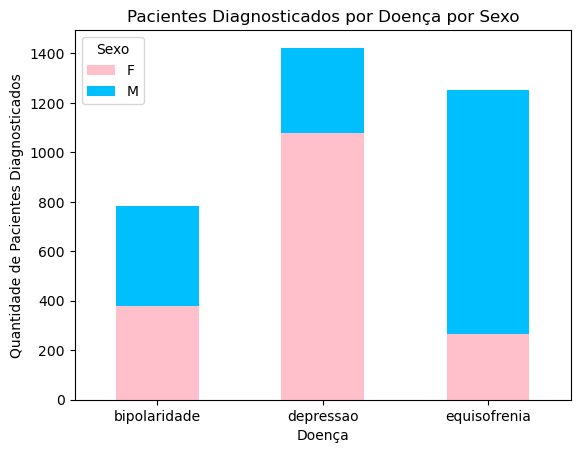

In [5]:
# Quantidade de pessoas diagnosticadas com alguma das doenças mentais levantadas para os dois sexos da população amostrada
counts = df.groupby(['Doenca', 'Sexo']).size().unstack()

# Plotando gráfico
sns.set_palette('Set3')
colors = {'F': 'pink', 'M': 'deepskyblue'}
counts.plot(kind='bar', stacked=True, color=[colors[col] for col in counts.columns])
plt.title('Pacientes Diagnosticados por Doença por Sexo')
plt.xlabel('Doença')
plt.xticks(rotation=0)
plt.ylabel('Quantidade de Pacientes Diagnosticados')
plt.show()


O gráfico acima indica que a doença que mais aflinge a população amostrada é a depressão, seguida da esquizofrenia e bipolaridade. Para cada doença, é possível observar o sexo da popualçao diagnosticada. Sendo a maior parte de população feminina aflingida por depressão, seguida de bipolaridade e esquizofrenia. Já para a porção do sexo masculino, sua maioria foi diagnosticada com esquizofrenia, seguida de bipolaridade e depressão.

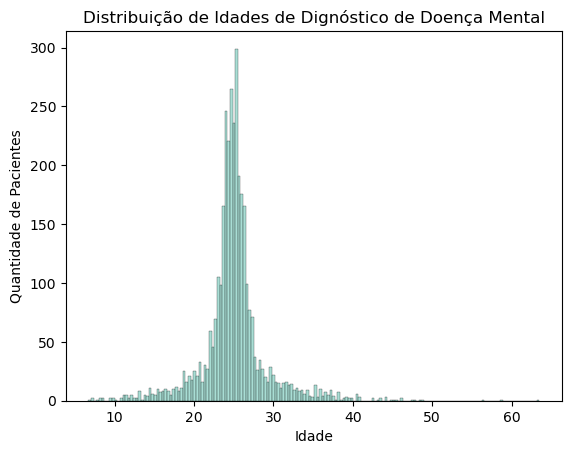

In [6]:
# Distribuição das idades de diagnóstico
sns.histplot(x='Idade', data=df)
plt.title('Distribuição de Idades de Dignóstico de Doença Mental')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Pacientes')
plt.show()


O gráfico de distribuição de idades indica que a maior parte da popualação diagnosticada com alguma das doenças mentais levantadas foi observada entre as idades de 20 e 30 anos, sendo a ideda média de diagnóstico por volta dos 25 anos de idade.

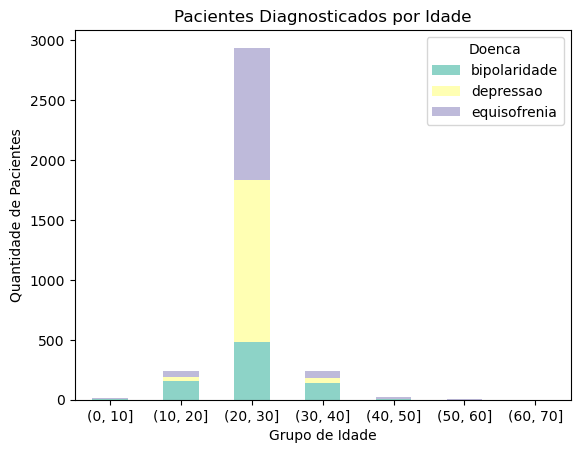

In [7]:
# Doença diagnosticada por grupo de idade
df['Grupo de Idade'] = pd.cut(df['Idade'], bins=[0, 10, 20, 30, 40, 50, 60, 70])
counts = df.groupby(['Grupo de Idade', 'Doenca'])['Sexo'].count().unstack('Doenca').fillna(0)
counts.plot(kind='bar', stacked=True)
plt.title('Pacientes Diagnosticados por Idade')
plt.xlabel('Grupo de Idade')
plt.xticks(rotation=0)
plt.ylabel('Quantidade de Pacientes')
plt.show()


O gráfico indica quais são a doenças mais diagnosticadas por grupo idade. Levando em consideração a faixa de idade de 20-30 anos, na qual grande parte dos diagnósticos ocorre, nota-se que o diagnóstico de depressão é mais o comum nessa para essas idades, seguida de esquizofrenia e bipolaridade. Já os outros dois grupos com quantidade considerável de dignósticos, nas faixas de 10-20 e de 30-40 anos, as quantidades de pacientes diagnosticados por tipo de doença se comportam de forma semelhante - a maior parte dos pacientes sendo diagnosticada com bipolaridade, seguido de esquizofrenia e depressão.